K-NEAREST NEIGHBORS CLASSIFICATION ANALYSIS 
Dataset: Iris Classification

 LOADING AND PREPARING IRIS DATASET

Dataset Shape: (150, 6)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Classes: ['setosa', 'versicolor', 'virginica']

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 

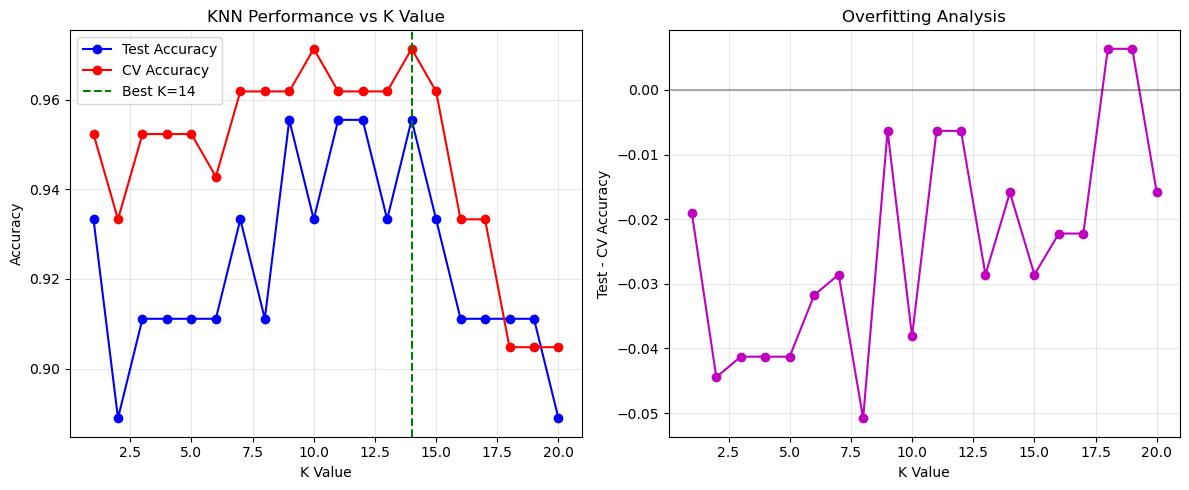


 TRAINING BEST MODEL 

Best Model: KNN with K=14
Training completed successfully!

 MODEL EVALUATION 

Test Accuracy: 0.9556 (95.56%)

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45


Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]


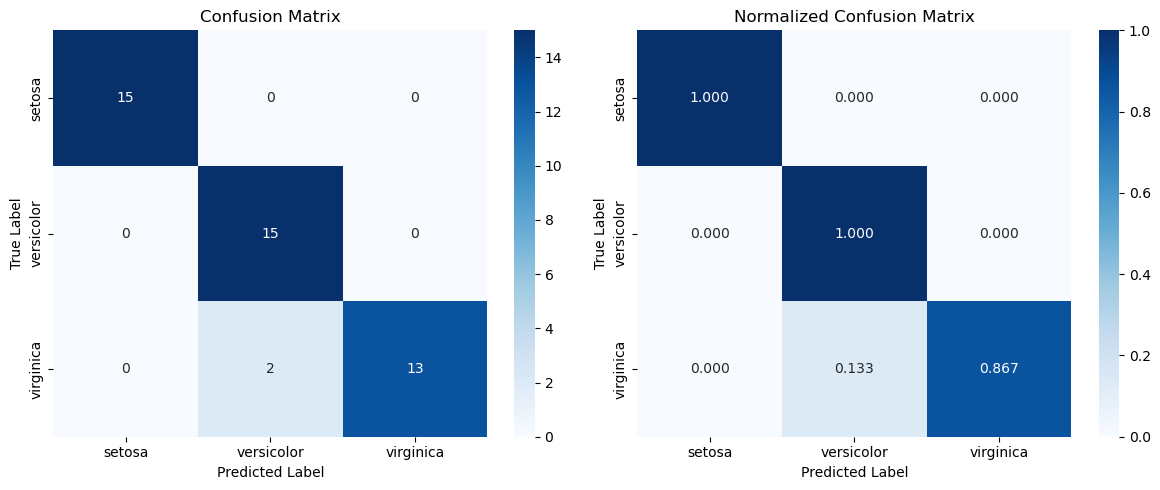


Misclassified Samples: 2
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                6.3               2.8                5.1               1.5   
1                4.9               2.5                4.5               1.7   

        True   Predicted  
0  virginica  versicolor  
1  virginica  versicolor  

 DECISION BOUNDARY VISUALIZATION



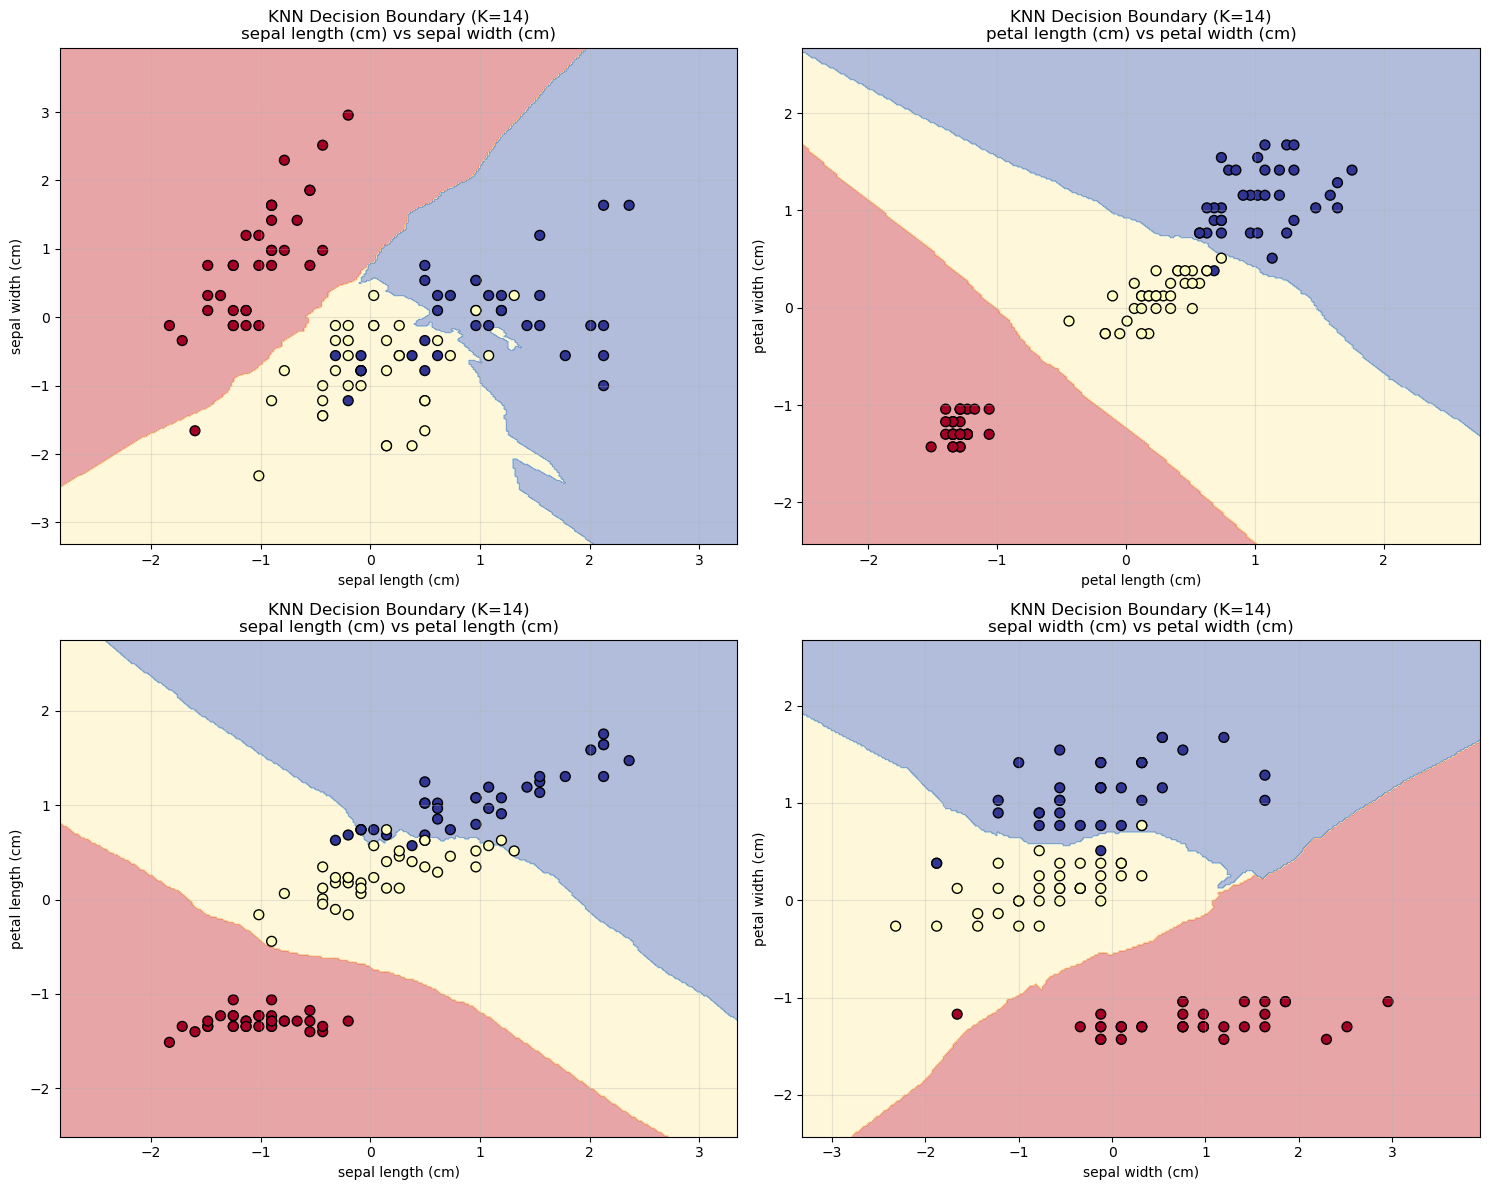

Decision boundaries visualized for different feature pairs.
Colors represent different classes, and the background shows decision regions.

FEATURE ANALYSIS 



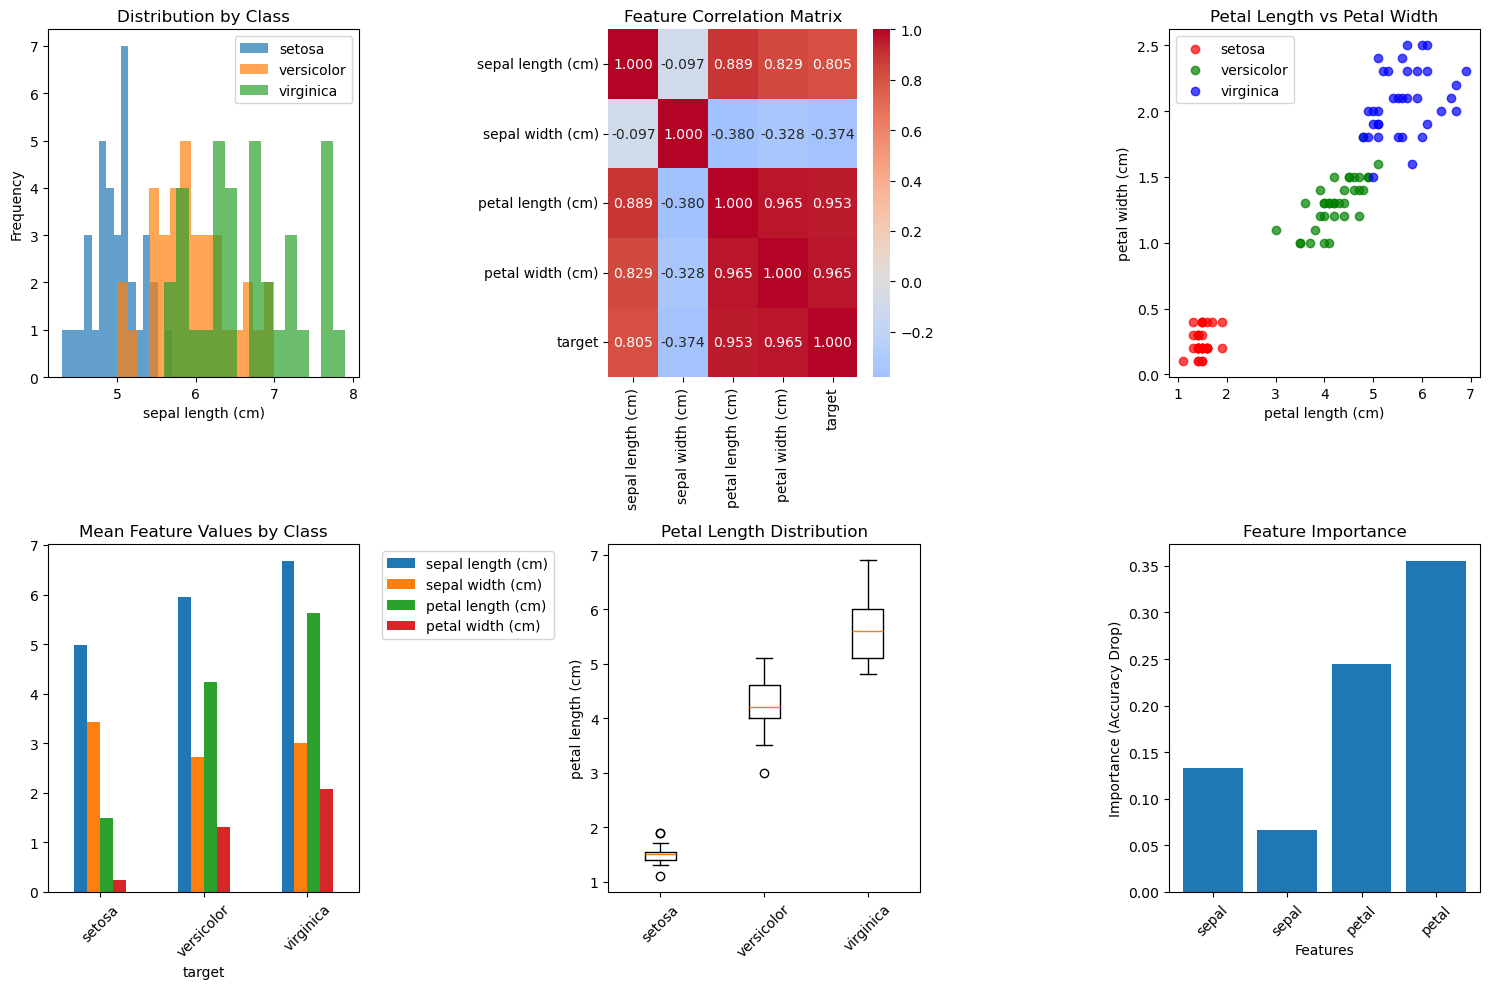

Feature Analysis:
sepal length (cm): 0.1333
sepal width (cm): 0.0667
petal length (cm): 0.2444
petal width (cm): 0.3556


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

class KNNClassificationAnalysis:
    """
    Complete KNN Classification Analysis Class
    """
    
    def __init__(self):
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.scaler = StandardScaler()
        self.best_k = None
        self.best_model = None
        self.feature_names = None
        self.target_names = None
        
    def load_and_prepare_data(self):
        """
        Load Iris dataset and prepare for analysis
        """
        
        print("\n LOADING AND PREPARING IRIS DATASET\n")
        
        
    
        iris = load_iris()
        self.X = iris.data
        self.y = iris.target
        self.feature_names = iris.feature_names
        self.target_names = iris.target_names
        
       
        df = pd.DataFrame(self.X, columns=self.feature_names)
        df['target'] = self.y
        df['species'] = [self.target_names[i] for i in self.y]
        
        print(f"Dataset Shape: {df.shape}")
        print(f"Features: {list(self.feature_names)}")
        print(f"Target Classes: {list(self.target_names)}")
        print("\nFirst 5 rows:")
        print(df.head())
        
        print("\nDataset Info:")
        print(df.info())
        
        print("\nTarget Distribution:")
        print(df['species'].value_counts())
        
        return df
    
    def normalize_features(self):
        """
        Normalize features using StandardScaler
        """
       
        print("\n FEATURE NORMALIZATION \n")
        
        
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=0.3, random_state=42, stratify=self.y
        )
        
        print(f"Training set size: {self.X_train.shape}")
        print(f"Test set size: {self.X_test.shape}")
        
        
        print("\nBefore Normalization (Training Set):")
        train_stats = pd.DataFrame(self.X_train, columns=self.feature_names).describe()
        print(train_stats.round(3))
        
        
        self.X_train_scaled = self.scaler.fit_transform(self.X_train)
        self.X_test_scaled = self.scaler.transform(self.X_test)
        
       
        print("\nAfter Normalization (Training Set):")
        scaled_stats = pd.DataFrame(self.X_train_scaled, columns=self.feature_names).describe()
        print(scaled_stats.round(3))
        
    def experiment_with_k_values(self):
        """
        Experiment with different values of K
        """
        
        print("\n EXPERIMENTING WITH DIFFERENT K VALUES \n")
        
       
        k_range = range(1, 21)
        k_scores = []
        k_cv_scores = []
        
        print("Testing K values from 1 to 20...")
        
        for k in k_range:
            
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(self.X_train_scaled, self.y_train)
            
           
            y_pred = knn.predict(self.X_test_scaled)
            accuracy = accuracy_score(self.y_test, y_pred)
            k_scores.append(accuracy)
            
            
            cv_scores = cross_val_score(knn, self.X_train_scaled, self.y_train, cv=5)
            k_cv_scores.append(cv_scores.mean())
            
            if k <= 10 or k % 5 == 0:  
                print(f"K={k:2d}: Test Accuracy={accuracy:.4f}, CV Accuracy={cv_scores.mean():.4f} (±{cv_scores.std()*2:.4f})")
        
        
        self.best_k = k_range[np.argmax(k_cv_scores)]
        print(f"\nBest K based on Cross-Validation: {self.best_k}")
        print(f"Best CV Accuracy: {max(k_cv_scores):.4f}")
        
     
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        plt.plot(k_range, k_scores, 'bo-', label='Test Accuracy')
        plt.plot(k_range, k_cv_scores, 'ro-', label='CV Accuracy')
        plt.axvline(x=self.best_k, color='g', linestyle='--', label=f'Best K={self.best_k}')
        plt.xlabel('K Value')
        plt.ylabel('Accuracy')
        plt.title('KNN Performance vs K Value')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        plt.subplot(1, 2, 2)
        plt.plot(k_range, np.array(k_scores) - np.array(k_cv_scores), 'mo-')
        plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
        plt.xlabel('K Value')
        plt.ylabel('Test - CV Accuracy')
        plt.title('Overfitting Analysis')
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        return k_scores, k_cv_scores
    
    def train_best_model(self):
        """
        Train the best KNN model
        """
       
        print("\n TRAINING BEST MODEL \n")
        
        
        self.best_model = KNeighborsClassifier(n_neighbors=self.best_k)
        self.best_model.fit(self.X_train_scaled, self.y_train)
        
      
        self.y_pred = self.best_model.predict(self.X_test_scaled)
        self.y_pred_proba = self.best_model.predict_proba(self.X_test_scaled)
        
        print(f"Best Model: KNN with K={self.best_k}")
        print(f"Training completed successfully!")
        
    def evaluate_model(self):
        """
        Evaluate model using accuracy and confusion matrix
        """
        print("\n MODEL EVALUATION \n")
        
        
       
        accuracy = accuracy_score(self.y_test, self.y_pred)
        print(f"Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
        
        
        print("\nClassification Report:")
        print(classification_report(self.y_test, self.y_pred, target_names=self.target_names))
        
        
        cm = confusion_matrix(self.y_test, self.y_pred)
        print("\nConfusion Matrix:")
        print(cm)
        
        
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                   xticklabels=self.target_names, yticklabels=self.target_names)
        plt.title('Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        
        
        cm_norm = confusion_matrix(self.y_test, self.y_pred, normalize='true')
        plt.subplot(1, 2, 2)
        sns.heatmap(cm_norm, annot=True, fmt='.3f', cmap='Blues',
                   xticklabels=self.target_names, yticklabels=self.target_names)
        plt.title('Normalized Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        
        plt.tight_layout()
        plt.show()
        
        
        misclassified = self.X_test[self.y_test != self.y_pred]
        if len(misclassified) > 0:
            print(f"\nMisclassified Samples: {len(misclassified)}")
            misclass_df = pd.DataFrame(misclassified, columns=self.feature_names)
            misclass_df['True'] = [self.target_names[i] for i in self.y_test[self.y_test != self.y_pred]]
            misclass_df['Predicted'] = [self.target_names[i] for i in self.y_pred[self.y_test != self.y_pred]]
            print(misclass_df)
        else:
            print("\nNo misclassified samples! Perfect classification!")
    
    def visualize_decision_boundaries(self):
        """
        Visualize decision boundaries for 2D feature pairs
        """
        print("\n DECISION BOUNDARY VISUALIZATION\n")
        
        feature_pairs = [
            (0, 1),  
            (2, 3),  
            (0, 2),  
            (1, 3)   
        ]
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        axes = axes.ravel()
        
        for idx, (i, j) in enumerate(feature_pairs):
           
            X_pair = self.X_train_scaled[:, [i, j]]
            y_pair = self.y_train
           
            knn_2d = KNeighborsClassifier(n_neighbors=self.best_k)
            knn_2d.fit(X_pair, y_pair)
            
            
            h = 0.02
            x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
            y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                               np.arange(y_min, y_max, h))
            
            
            Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            
            
            axes[idx].contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
            scatter = axes[idx].scatter(X_pair[:, 0], X_pair[:, 1], c=y_pair, 
                                     cmap=plt.cm.RdYlBu, edgecolors='black', s=50)
            axes[idx].set_xlabel(self.feature_names[i])
            axes[idx].set_ylabel(self.feature_names[j])
            axes[idx].set_title(f'KNN Decision Boundary (K={self.best_k})\n{self.feature_names[i]} vs {self.feature_names[j]}')
            axes[idx].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        print("Decision boundaries visualized for different feature pairs.")
        print("Colors represent different classes, and the background shows decision regions.")
    
    def feature_importance_analysis(self):
        """
        Analyze feature importance through various methods
        """
        print("\nFEATURE ANALYSIS \n")
        
        
        df_analysis = pd.DataFrame(self.X_train, columns=self.feature_names)
        df_analysis['target'] = self.y_train
        
        plt.figure(figsize=(15, 10))
        
        
        plt.subplot(2, 3, 1)
        for i, species in enumerate(self.target_names):
            mask = self.y_train == i
            plt.hist(self.X_train[mask, 0], alpha=0.7, label=species, bins=15)
        plt.xlabel(self.feature_names[0])
        plt.ylabel('Frequency')
        plt.title('Distribution by Class')
        plt.legend()
        
        plt.subplot(2, 3, 2)
        corr_matrix = df_analysis.corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.3f')
        plt.title('Feature Correlation Matrix')
        
        
        plt.subplot(2, 3, 3)
        colors = ['red', 'green', 'blue']
        for i, species in enumerate(self.target_names):
            mask = self.y_train == i
            plt.scatter(self.X_train[mask, 2], self.X_train[mask, 3], 
                       c=colors[i], label=species, alpha=0.7)
        plt.xlabel(self.feature_names[2])
        plt.ylabel(self.feature_names[3])
        plt.title('Petal Length vs Petal Width')
        plt.legend()
        
    
        plt.subplot(2, 3, 4)
        df_stats = df_analysis.groupby('target').mean()
        df_stats.plot(kind='bar', ax=plt.gca())
        plt.title('Mean Feature Values by Class')
        plt.xticks([0, 1, 2], self.target_names, rotation=45)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        
        plt.subplot(2, 3, 5)
        species_data = [self.X_train[self.y_train == i, 2] for i in range(3)]
        plt.boxplot(species_data, labels=self.target_names)
        plt.ylabel(self.feature_names[2])
        plt.title('Petal Length Distribution')
        plt.xticks(rotation=45)
       
        plt.subplot(2, 3, 6)
        feature_importance = []
        baseline_score = accuracy_score(self.y_test, self.y_pred)
        
        for i in range(len(self.feature_names)):
            X_test_permuted = self.X_test_scaled.copy()
            X_test_permuted[:, i] = np.random.permutation(X_test_permuted[:, i])
            y_pred_permuted = self.best_model.predict(X_test_permuted)
            permuted_score = accuracy_score(self.y_test, y_pred_permuted)
            importance = baseline_score - permuted_score
            feature_importance.append(importance)
        
        plt.bar(range(len(self.feature_names)), feature_importance)
        plt.xlabel('Features')
        plt.ylabel('Importance (Accuracy Drop)')
        plt.title('Feature Importance')
        plt.xticks(range(len(self.feature_names)), 
                  [name.split(' ')[0] for name in self.feature_names], rotation=45)
        
        plt.tight_layout()
        plt.show()
        
        print("Feature Analysis:")
        for i, (feature, importance) in enumerate(zip(self.feature_names, feature_importance)):
            print(f"{feature}: {importance:.4f}")
    
    def run_complete_analysis(self):
        """
        Run the complete KNN classification analysis
        """
        print("K-NEAREST NEIGHBORS CLASSIFICATION ANALYSIS ")
        print("Dataset: Iris Classification")
        
        
        df = self.load_and_prepare_data()
       
        self.normalize_features()
       
        k_scores, k_cv_scores = self.experiment_with_k_values()
        self.train_best_model()
   
        self.evaluate_model()
       
        self.visualize_decision_boundaries()
     
        self.feature_importance_analysis()
        
if __name__ == "__main__":
    
    knn_analysis = KNNClassificationAnalysis()
    knn_analysis.run_complete_analysis()